# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Khansa Fitri Zhafirah
- **Email:** m001b4kx2206@bangkit.academy
- **ID Dicoding:** khansafitriz

## Menentukan Pertanyaan Bisnis

- Apakah cuaca dapat mempengaruhi jumlah penyewaan sepeda?
- Apakah penyewaan sepeda dipengaruhi oleh hari kerja dan hari libur?
- Bagaimana pola penyewaan sepeda per jam dalam satu hari?

## Import Semua Packages/Library yang Digunakan

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Import data csv menggunakan pd.read_csv dan simpan data pertama ke variabel data1 dan data kedua ke variabel data2

In [165]:
data1 = pd.read_csv("./data/data1.csv", delimiter=",")
data2 = pd.read_csv("./data/data2.csv", delimiter=",")

Menampilkan data1 secara singkat

In [166]:
data1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menampilkan data2 secara singkat

In [167]:
data2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Gathering data merupakan proses pengumpulan data. Pada proyek ini digunakan 2 file data yaitu data1 dan data2.
- Perbedaan data1 dan data2, yaitu data1 menyediakan informasi pada tingkat harian sedangkan data 2 pada tingkat jam.

### Assessing Data

Memeriksa tipe data data dari tiap kolom yang terdapat dalam data1

In [168]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Note : Kolom dteday harusnya direpresentasikan sebagai tipe data datetime bukan object karena object digunakan untuk data string

Menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom

In [169]:
data1.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

data1 tidak memiliki missing value

Memeriksa duplikasi data

In [170]:
print("Jumlah duplikasi: ", data1.duplicated().sum())

Jumlah duplikasi:  0


data1 tidak memiliki duplikasi data

Memeriksa parameter statistik dari kolom numerik 

In [171]:
data1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


data1 tidak memiliki keanehan

Memeriksa tipe data data dari tiap kolom yang terdapat dalam data2

In [172]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Note : Kolom dteday harusnya direpresentasikan sebagai tipe data datetime bukan object karena object digunakan untuk data string

Menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom

In [173]:
data2.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

data2 tidak memiliki missing value

Memeriksa duplikasi data

In [174]:
print("Jumlah duplikasi: ", data2.duplicated().sum())

Jumlah duplikasi:  0


data2 tidak memiliki duplikasi data

Memeriksa parameter statistik dari kolom numerik 

In [175]:
data2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


data2 tidak memiliki keanehan

**Insight:**
- Hasil dari tahap ini dapat menginformasikan bahwa data1 dan data2 tidak memiliki missing value, duplicate data, dan inaccurate value.
- Pada data1 dan data2 terdapat kesalahan dalam tipe data pada kolom "dteday" dimana kedua set data tidak menggunakan tipe datetime melainkan object 

### Cleaning Data

Kita perlu menyelesaikan permasalahan data diatas yang mana kita perlu mengganti tipe data dteday dari object menjad datetime

Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas

In [176]:
kolom_dteday = ["dteday"]
 
for column in kolom_dteday:
  data1[column] = pd.to_datetime(data1[column])

Kode di atas akan mengubah tipe data pada kolom dteday data1

Mengecek kembali tipe data dari data1

In [177]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data dari data1 suda sesuai

Kode berikut akan mengubah tipe data pada kolom dteday data2

In [178]:
kolom_dteday = ["dteday"]
 
for column in kolom_dteday:
  data2[column] = pd.to_datetime(data2[column])

Mengecek kembali tipe data dari data2

In [179]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data dari data2 suda sesuai

**Insight:**
- Proses cleaning data sudah selesai baik pada data1 dan data2
- Kedua data sudah siap digunakan untuk analisis

## Exploratory Data Analysis (EDA)

### Explore untuk menjawa pertanyaan 1, 2, dan 3

*Menghitung Rata-rata Penyewaan Berdasarkan Jenis Cuaca menggunakan data 2*

In [156]:
dampak_cuaca = data2.groupby(by="weathersit")["cnt"].mean().reset_index()

Pada perhitungan diatas kita menggunakan rata-rata (mean) agar dapat membandingkan secara adil setiap jenis cuaca dengan 
jumlah penyewaan sepeda tanpa bias durasi hari cuaca tertentu. Jika hanya menggunakan jumlah total (sum), cuaca yang lebih 
sering terjadi akan tampak memiliki lebih banyak penyewaan yang sebenarnya hal tersebut hanya karena durasinya yang lebih lama, 
bukan karena pengaruh cuacanya secara langsung.

*Menghitung Rata-rata Penyewaan pada Hari Libur dan Hari Kerja menggunakan data1*

In [157]:
dampak_libur = data1.groupby('holiday')['cnt'].mean().reset_index()

Pada perhitungan diatas kita juga menggunakan rata-rata (mean) agar dapat membandingkan secara adil antara hari kerja dan hari libur dengan 
jumlah penyewaan sepeda tanpa adanya bias dari durasi hari kerja yang lebih lama. Jika hanya menggunakan jumlah total (sum), hari kerja yang lebih 
sering terjadi akan tampak memiliki lebih banyak penyewaan dibanding hari libur.

*Menghitung Total Penyewaan Sepeda Berdasarkan Jam menggunakan data2*

In [158]:
total_jam = data2.groupby("hr")["cnt"].sum().reset_index()

Pada perhitungan diatas kita menggunakan jumlah total (sum) karena ingin melihat total penyewaan sepeda yang terjadi pada setiap jam dalam satu hari

**Insight:**
- Kode diatas merupakan proses pengolahan data agar dapat menghasilkan jawaban dari ketiga pertanyaan diatas

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Kode berikut mengubah nama kolom rata-rata penyewaan berdasarkan cuaca sekaligus memvisualisasikan Rata-rata Penyewaan Berdasarkan Cuaca

C:\Users\user\AppData\Local\Temp\ipykernel_27068\1554186367.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


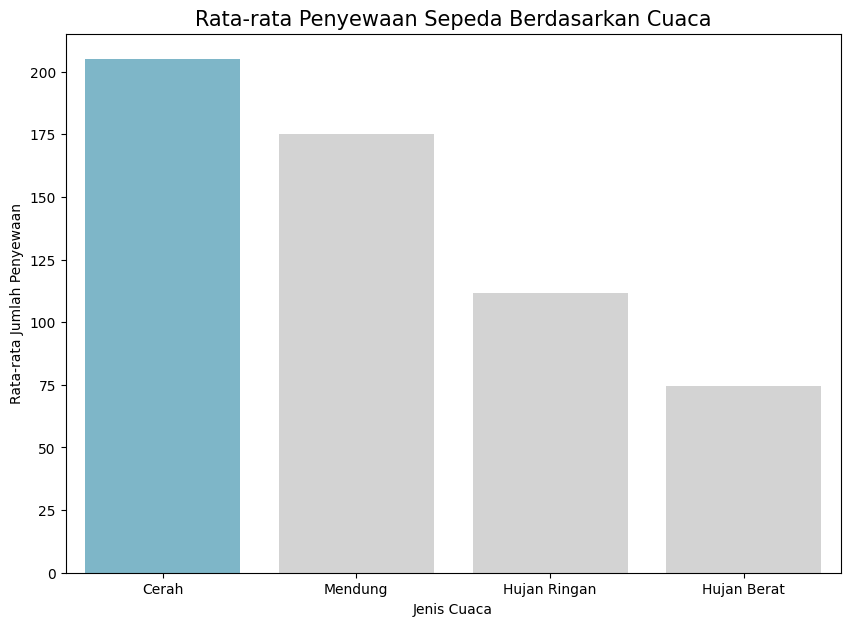

In [159]:
dampak_cuaca.rename(columns={
    "cnt": "rata2_penyewaan"
}, inplace=True)

plt.figure(figsize=(10, 7))
sns.barplot(
    y="rata2_penyewaan", 
    x="weathersit",
    data=dampak_cuaca.sort_values(by="rata2_penyewaan", ascending=False),
    palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"],
    dodge=False
)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xlabel("Jenis Cuaca")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Berat'])
plt.show()

### Pertanyaan 2:

Kode berikut mengubah nilai hari libur dan mengubah nama kolom. Selain itu kode ini juga memvisualisasi Rata-rata Penyewaan Berdasarkan Hari Kerja dan Hari Libur

C:\Users\user\AppData\Local\Temp\ipykernel_27068\275608657.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_27068\275608657.py:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(


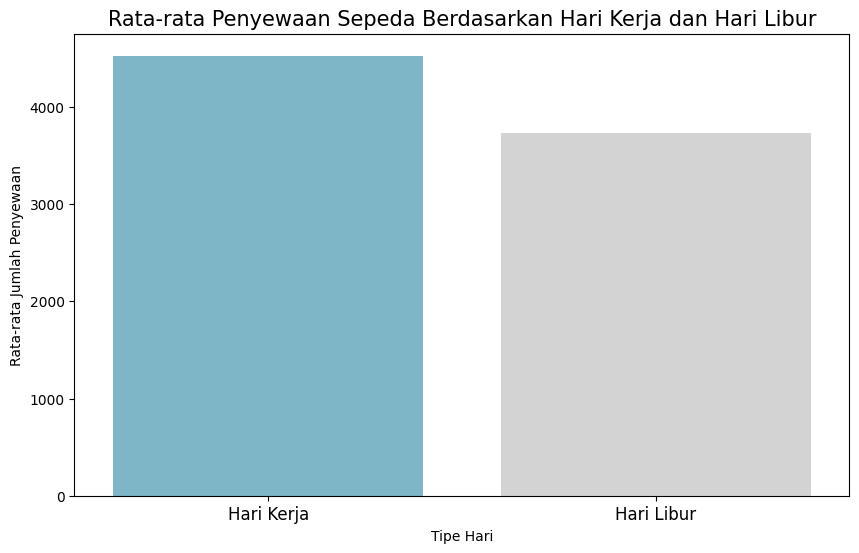

In [160]:
dampak_libur["holiday"] = dampak_libur["holiday"].map({0: "Hari Kerja", 1: "Hari Libur"})
data_libur = dampak_libur.rename(columns={"cnt": "rata2_penyewaan"})

plt.figure(figsize=(10, 6))

sns.barplot(
    y="rata2_penyewaan", 
    x="holiday",
    data=data_libur.sort_values(by="rata2_penyewaan", ascending=False),
    palette=["#72BCD4", "#D3D3D3", "#D3D3D3"]
)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur", loc="center", fontsize=15)
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xlabel("Tipe Hari")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3:

Kode berikut memvisulisasikan penyewaan sepeda per jam

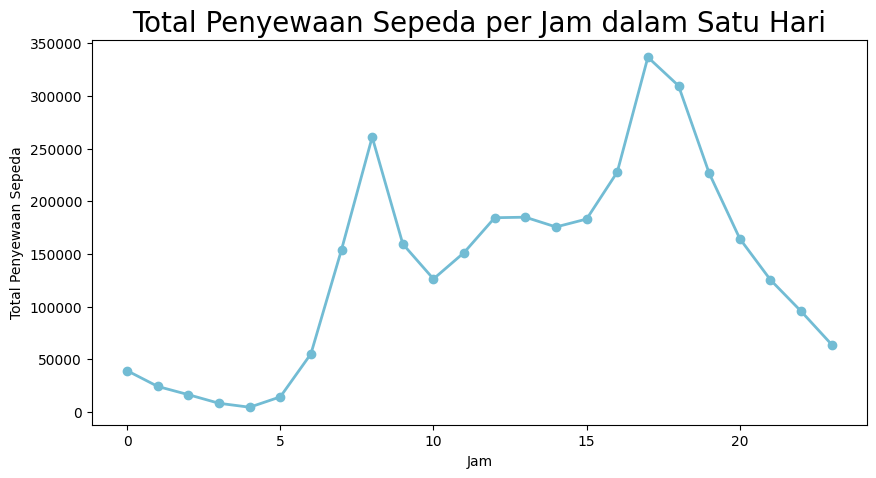

In [161]:
plt.figure(figsize=(10, 5))
plt.plot(
    total_jam["hr"],
    total_jam["cnt"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Penyewaan Sepeda per Jam dalam Satu Hari", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Jam")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

**Insight:**
- Dengan menggunakan library numpy dan pandas perhitungan maupun proses pengolahan diatas lebih mudah
- Dengan menggunakan library matplotlib dan seaborn visulisasi data menjadi lebih informatik dan menarik

## Conclusion

*Kesimpulan dari pertanyaan 1*


Berdasarkan visualisasi di atas mengenai rata-rata penyewaan sepeda berdasarkan cuaca, dapat disimpulkan 
bahwa penyewaan sepeda dipengaruhi oleh cuaca. Sesuai hasil yang didapat bahwa cuaca cerah memiliki jumlah 
penyewaan tertinggi, disusul dengan cuaca mendung, dan jumlah terendah berada di cuaca hujan berat.

*Kesimpulan dari pertanyaan 2*

Berdasarkan visualisasi di atas mengenai rata-rata penyewaan sepeda berdasarkan hari kerja dan hari libur, dapat disimpulkan 
bahwa penyewaan sepeda dipengaruhi oleh hari kerja dan hari libur walaupun tidak jauh berbeda. Hari kerja memiliki jumlah 
rata-rata yang lebih tinggi dibanding hari libur yang memiliki rata-rata sekitar 4000 lebih.

*Kesimpulan dari pertanyaan 3*

Berdasarkan visualisasi di atas mengenai total penyewaan sepeda per jam dalam satu hari, terlihat bahwa waktu yang paling tinggi 
pada saat pagi dan sore hari. Pada waktu menjelang siang dan tengah tren penyewaan sepeda menurun.